** 22063
* 그래서 어제 우린 뭘 했을까
###### 맛보기라고 합니다 (어딜봐서)
###### iris 데이터를 가져와서 정보를 살펴보고 학습용 데이터랑 시험용 데이터를 만들어서 예측율이 얼마나 되나 한번 봅시다아아

In [24]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()

In [ ]:
# 이 안에 어떤 형태의 데이터들이 존재할까
iris_data.keys()

In [ ]:
# Key-Value로 이루어진 것이 꼭 딕셔너리 같다
# 이렇게 데이터들을 하나하나 보고 추적하는 걸 탐색적 방법이라고 할 수 있을 것이다
iris_data.values()

* 학습용 데이터랑 시험용 데이터를 따로 한 번 뽑아봅시다

In [17]:
X_train = iris_data.data[0:120] # 120개 
X_test = iris_data.data[120:] # 120부터 나머지 (30개)

In [22]:
Y_train = iris_data.target[0:120] # 120개
Y_test = iris_data.target[120:] # 120부터 나머지 (30개)

In [23]:
Y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

* 데이터고 타겟이고 150개씩 있어서 그냥 들어있는 순서대로 뽑아봤는데
* 순서대로 뽑다 보니 학습용 데이터랑 시험용 데이터가 어째... 이상하지?
* 나는 여러가지 데이터가 섞인 걸 보고 싶었는데 이건 너무 지나치게 어느 하나에 쏠려있다고 생각되지 않나요?
* 그래서 이건 잘못된 데이터를 뽑았다. 여러가지 골고루 섞여있어야 좋은 거지 저렇게 편중되어 있으면 곤란합니다

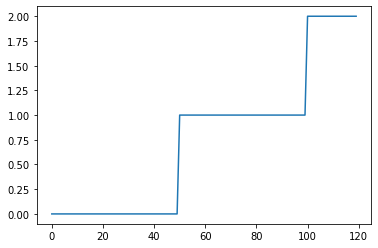

In [26]:
# 그래프로 보면 확실히 순서대로 뽑는 게 뭔가 더 잘못됐다는 게 느껴지겠죠
import matplotlib.pyplot as plt
plt.plot(Y_train)

* 근데 그렇다고 우리가 수작업으로 각각의 성분에서 일부분 추출하는 건 노가다야
* 사이킷런은 자기가 데이터 분포를 보고 적당히 학습용 데이터랑 시험용 데이터를 적절히 뽑아줍니다
* 그게 sklearn.model_selection의 train_test_split() 함수 : 분류는 라이브러리가 할테니까 우리는 데이터 예측에 신경을 더 씁시다

### * sklearn.model_selection
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

# * sklearn.tree.DecisionTreeClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

# * sklearn.metrics.accuary_score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(max_depth=2, random_state=121)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(f'예측정확도:{accuracy_score(pred, y_test):.4f}')

예측정확도:0.9333


* max_depth=2를 줬을 때랑 안 줬을 때랑 예측정확도가 다름
* pred 데이터를 max_depth 줬을 때, 안 줬을 때를 비교해보면 예측값이 몇 개 다르다는 게 보일 것임
* 그리고 그걸 tree로 보면 더 티가 남
* 함수 안에 선언하는 파라미터들에(Hyper Parameter) 따라 예측하는 데이터들이나 정확도가 달라질 수도 있다는 걸 알아두자
* 이렇게 모델링하면서 파라미터들 조정해가지고 평가하고 최종 모델, 가장 최적화된 모델을 선택
* 데이터를 뭘 줄고 레이블 어떻게 만지고 파라미터들은 또 뭘 건드리고.. 여기저기 건드려가면서 최적화를 시켜줘야함

In [46]:
pred

array([1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0,
       1])

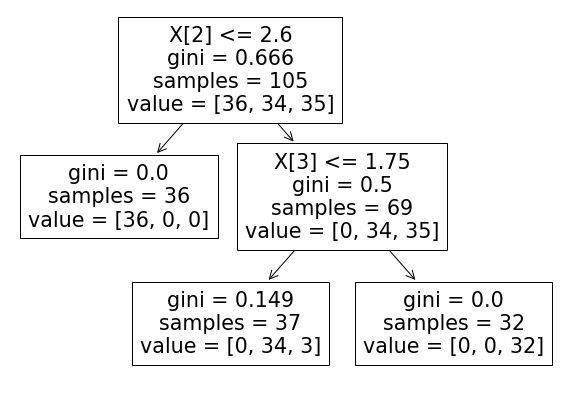

In [52]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt_clf)
plt.show()